In [103]:
from train import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

In [123]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [9.0, 6.0]

# Network resiliance analysis

Here we determine how resiliant our network is to corrputed input by training it on a set of four patterns corresponding to the word2bits vector of the category name (e.g. 'animal') and randomly flipping an increasing number of bits. 

In [71]:
flip_result = run_flip_analysis(300) 

In [121]:
xs = []
ys = []
for point in flip_result:
    x, y = point
    xs.append(x)
    ys.append(y)    

new_xs = []
new_ys = []
for num in range(0, 300, 30):
    new_xs.append(num)
    new_ys.append(np.mean(ys[num:num+30]))

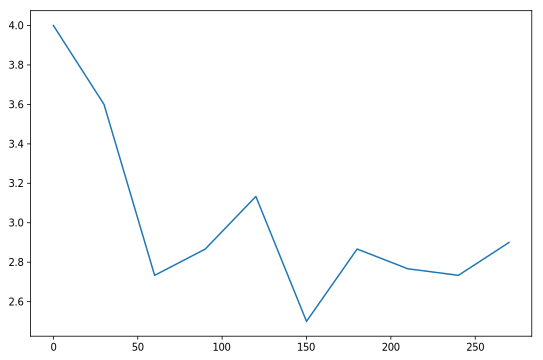

In [122]:
plt.plot(new_xs, new_ys)
#plt.savefig('./figs/corrupt_bits.svg')

# Input pattern comparison

Here we assess the selection of the following input vector types: 
1. the vector of the category (e.g. 'animal')
2. the 'consensus' vector of all of the items in the category, which we derive by computing the most common value across items (-1 or 1) for each of the 1200 dimensions.
3. the vector of a common item in the category (e.g. 'dog' for 'animal')
4. the vector of an uncommon item in the category (e.g. 'marmoset' for 'animal')

In [39]:
result = run_vector_analysis()

In [44]:
df = pd.DataFrame(result)

In [107]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

category_vector
Confusion matrix, without normalization
[[34  0  1 17]
 [ 2 28  1  1]
 [ 0  0 20 10]
 [ 0  0  2 18]]


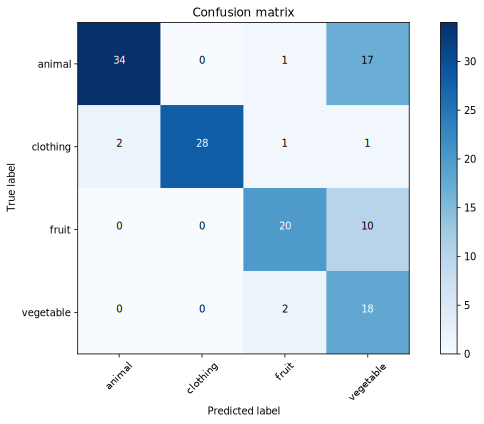

high_vector
Confusion matrix, without normalization
[[14  0  0 38]
 [ 0 29  0  3]
 [ 1  0 20  9]
 [ 0  0  0 20]]


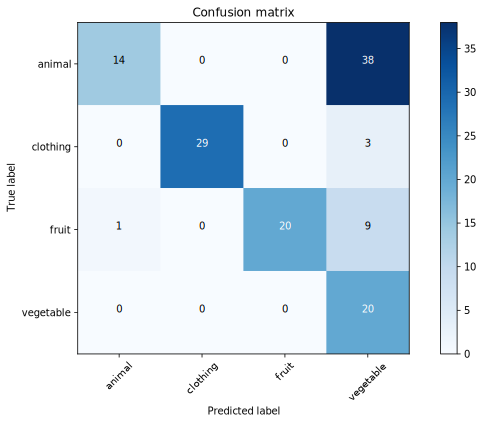

low_vector
Confusion matrix, without normalization
[[39  1  7  5]
 [ 0 31  0  1]
 [ 0  0 28  2]
 [ 0  0  8 12]]


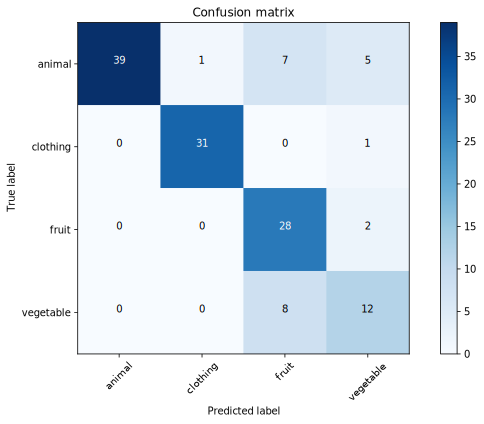

average_vector
Confusion matrix, without normalization
[[52  0  0  0]
 [ 2 30  0  0]
 [ 0  0 24  6]
 [ 0  0  0 20]]


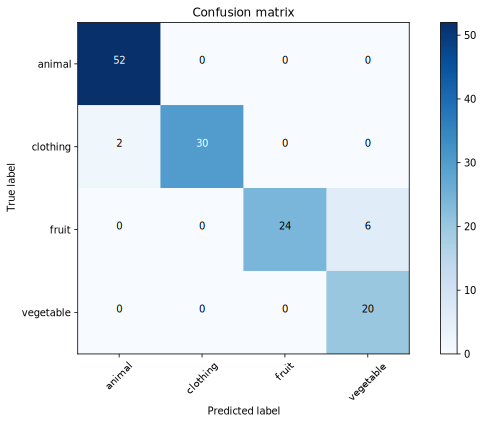

In [124]:
conf_data = make_confusion_matrix(df)
for v_type, val in conf_data.items():
    print(v_type)
    cm = confusion_matrix(val['y'],val['y_pred'], labels=list(data.keys()))
    plot_confusion_matrix(cm, list(data.keys()))
    #plt.savefig('./figs/' + v_type + '.svg')
    plt.show()

# Tomato Analysis

Here we settle an age-old question using our Hopfield network: ought we consider tomatos to be fruits or vegetables?

In [115]:
with open('./data/tomato.pickle', 'rb') as fi:
    tomato = pickle.load(fi)

In [118]:
input_patterns = [data[cat]['average_vector'] for cat in data.keys()]
# initialize the network
network = HopfieldNetwork(1200)
# train the network
hebbian_training(network, input_patterns)

In [120]:
tom_out = network.run(tomato)
tom_closest = find_closest(tomato, input_patterns)
print(mapping[tom_closest])

vegetable
